<img src="img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Introduction to Numerical Methods in Python

(c) Hywel Owen  
University of Manchester  
24th February 2020

As usual, we first initialise our Python interpreter:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

## Numerical Precision in Calculations

When we do a numerical calculation in our (favourite) programming language, we initially don't really worry about what form our numbers are being processed in. Here, we are implicitly using integers without worrying much about them:

In [2]:
x = 10
for i in range (20):
    x = (x-9)*10
    print(x)

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


We can explicitly check what form x has ended up as. Yes, it is an integer:

In [4]:
type(x)

int

Let's now do the same calculation, but explicitly with floating point numbers:

In [5]:
x = 10.0
for i in range (20):
    x = (x-9.0)*10.0
    print(x)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


Everything looks much the same, except that of course we see a decimal point after the number that indicates this time we have a floating-point variable. We can explicitly confirm this is the case:

In [6]:
type(x)

float

Now, we do the same calculation. At least, it looks similar enough. However, a problem emerges:

In [7]:
x = 1.0
for i in range (20):
    x = (x-0.9)/0.1
    print(x)

0.9999999999999998
0.9999999999999976
0.9999999999999754
0.9999999999997533
0.9999999999975329
0.9999999999753284
0.9999999997532838
0.9999999975328377
0.9999999753283773
0.9999997532837723
0.9999975328377231
0.9999753283772306
0.9997532837723055
0.9975328377230552
0.9753283772305521
0.7532837723055208
-1.4671622769447923
-23.67162276944792
-245.7162276944792
-2466.1622769447918


What has happened here? We can see that this calculation is steadily giving a greater and greater error. About 1 digit of accuracy is being lost at each iteration of the calculation.

What is happening? Let's try to look at this. First, we define a variable *y*:

In [8]:
y = 0.1
print(y)

0.1


So far, so good. But let's now explicitly display the number to greater precision, using the *format* command:

In [9]:
print('y = {:04.10f}'.format(y))

y = 0.1000000000


Seems okay so far. Let's look with even more precision:

In [10]:
print('y = {:04.30f}'.format(y))

y = 0.100000000000000005551115123126


Ahaa... Even though we have asked for the value **0.1** to be stored, Python has stored something slightly different. This is because Python (and most other languages) store floating numbers using a *binary* representation. And the number **0.1** cannot be represented in binary in closed form (i.e. the representation repeats forever).

This leads to some interesting issues. For example, let's compare two expressions. **0.1 + 0.1 + 0.1** should equal **0.3**, but using our internal binary representation it doesn't quite:

In [11]:
0.1 + 0.1 + 0.1 == 0.3

False

We should therefore be careful when comparing numbers with each other.

# Numerical Integration

Let's think about what numerical integration is. We start by looking at a simple integral of $\textrm{d} y/\textrm{d} x= 2x$. Obviously, we know analytically that $\int_0^{x_m} (\textrm{d} y/\textrm{d} x) \textrm{d} x = \int_0^x 2 x \textrm{d} x = x_m^2$ (here, $x_m$ is the upper limit of the integration and we have assumed that we are starting our intgeration from $x=0$). *Analytically* means that we know the answer from our knowledge of calculus, so we don't need in this case to do a numerical integration. Obviously this won't always be the case. But we can use this *known* integral as a way of checking that a particular numerical method we are using is giving a sensible answer.

There are lots of different integration methods (and ways of thinking about them), but we start here by noting that $\textrm{d} y/\textrm{d} x$ is the *gradient* of the function $y$, where $y$ is the integral we are trying to obtain.  
$y = x^2$ is the integral.  
$\textrm{d} y/\textrm{d} x = 2x$ is the 1st derivative of the integral.  

How do we go from knowing the derivative to knowing the integral? One way to think about it is that - for each step $h = \delta x$ in $x$, the integral changes by $\delta y = (\textrm{d} y/\textrm{d} x) \delta x = h (\textrm{d} y/\textrm{d} x)$.  

So, we can approximate the integral $y$ by performing a sum, with some chosen value of $h$. Try experimenting with different values of $h$:

In [37]:
# Define step size
h = 0.2
# Define limit of integration
x_m = 3
# Define initial value of integral (zero)
y_int = 0
# Define some y_int_vals that are the intermediate integral values; the first value (at x = 0) is zero
y_int_vals = np.array([0])
# Create values of x in steps of h
for x in np.arange(0,x_m,h):
    # For each value of x, add the corresponding value dy/dx * h
    y_int = y_int + h * (2*x)
    # Append the current y_int value to the array of intermediate values
    y_int_vals = np.append(y_int_vals,y_int)
# The final value of y_int is the numerical approximation

# Calculate analytical integral for comparison
y_ana = x_m**2
print('Analytical integral is {:04.10f}'.format(y_ana))
print('Numerical integral is {:04.10f}'.format(y_int))

Analytical integral is 9.0000000000
Numerical integral is 8.4000000000


We see that as $h$ gets larger, we have fewer points and a worse approximation. We can plot how the numerical integral compares to the true integral:

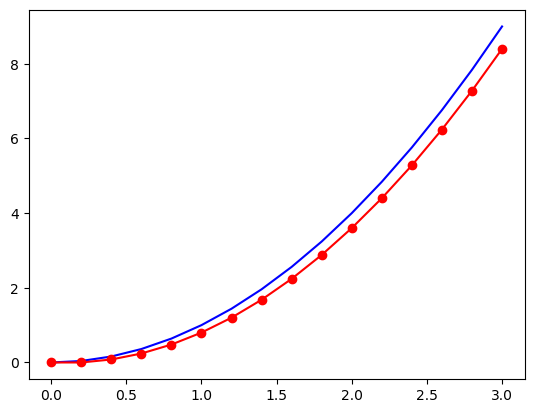

In [40]:
# Create some x values (just for plotting) - we need one extra one to match the number of y values we have
x = np.arange(0,x_m+h,h)
# Make some analytical y values:
y_ana_vals = x**2
plt.plot(x,y_ana_vals,'b') # True integral in blue
plt.plot(x,y_int_vals,'-ro') # Numerical approximation in red, showing the individual steps

We see that there is a small difference in the two integrals (analytical and numerical), that depends on $h$.

Let's look at this another way. We can think of the same integration task as calculating an *area*. Now, we think of it as 

$y = 2 x$ - this is the curve  
$A = x^2$ - this is the area under the curve $\int_0^{x_m} y dx$.

The calculation is exactly the same as before - it's just the picture that is different:

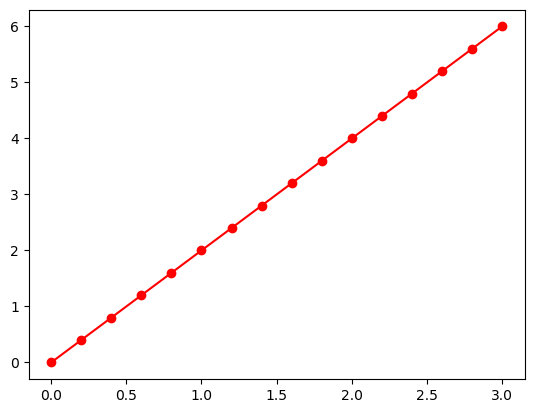

In [41]:
# Create some x values
x = np.arange(0,x_m+h,h)
# Calculate the y values
y_vals = 2*x
plt.plot(x,y_vals,'-ro') # Values of y that we add together

The numerical integral is just the area added at each value of $x$, which is just $y h$. The answer is the same as before.

## Euler's Method

Let's do something more interesting. Imagine now we have a spring-mass system. We know that the equation of motion of a spring-mass system is  
$ m a = - k x = b v $  
for some spring constant $k$ and some (viscous) damping constant $b$. This is the $entirety$ of the physics of the system. There is nothing else! The rest of the description is the $kinematics$.  

We think of the state of the spring-mass system at some time $t$. This system is completely described by *only* the position $x$ and the velocity $v$ at that time $t$; this is called the *configuration* of the system. Also, since the physics above tells us that 
$ a(t) = - (k/m) x(t) = (b/m) v(t) $,  
in other words the *evolution* of the system is only determined by the *configuration* at that time $t$. The physics does not include effect of what the configuration was at earlier times (for example, there might be some sort of elastic memory or other things like that).

We know also that obviously $v = \frac{\textrm{d} x}{\textrm{d} t}$.  

How can we model the *evolution* of the system as $t$ increases? We can use the same idea of integration as we had above. We imagine a small *time step* $h$, and for each step modify the position and velocity. Clearly, for some velocity $v$ the position will change as  
$x (t+h) = x(t) + h \cdot v(t)$  
Similarly, the velocity changes according to
$v (t+h) = v(t) + h \cdot a(t)$  
where $a(t)$ is the acceleration that we can calculate according to whatever the configuration $(x(t), v(t))$ is. These two equations look similar, but really the first one is just kinematics; the second one is the one that contains all the **physics** of the situation.

With this method of calculation, we only get new values of $x$ and $v$ at *discrete* times spaced apart by $h$. It's better to label them according to how many steps $i$ we have taken (each of size $h$ in time). So we re-write the equations as  
$x_{i+1} = x_{i} + h \cdot v_{i}$  
$v_{i+1} = v_{i} + h \cdot a_{i}$  
where
$a_{i} = -(k/m) x_{i} -(b/m) v_{i}$  

This is **Euler's Method**. It is a numerical integration just like we had above, but here we integrate two variables ($x$ and $v$) at the same time. If we choose some *initial conditions* $x(t=0)$ and $v(t=0)$, a step size $h$ and some physics parameters $m$, $k$, and $b$, we can then model the system over some specified time from $t =0$ to $t=T$.  

It is *very* important to distinguish two things. $m$, $k$, and $b$ describe the spring-mass system and the time $T$ that we trying to calculate its behaviour for; these are the physics parameters. Choosing Euler's Method and a particular value of $h$ is specifying the *algorithm* that we are using to approximately calculate the spring-mass system's behaviour.


Let's implement Euler's method in code. We just copy the lines from above:

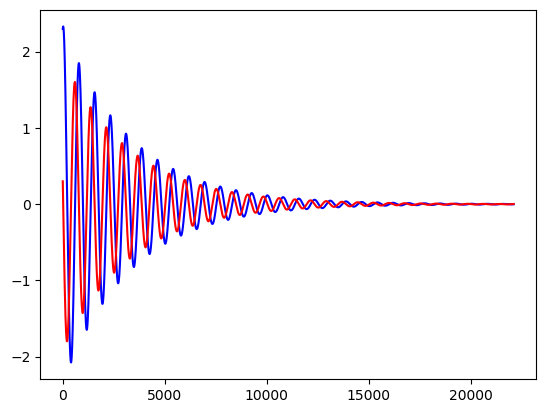

In [52]:
# Choose some physics parameters
m = 1.2
k = 0.8
b = 0.08
# Choose how long we are integrating for
T = 221
# Choose the step size
h = 0.01
# Determine how many steps there are (values of i); we need to use int to ensure we have a whole number
# of them, otherwise the loops won't work
nsteps = int(T/h)
# Create empty arrays ready for the values of x and v
x = np.zeros(nsteps)
v = np.zeros(nsteps)
# Choose some initial conditions
x[0] = 2.3
v[0] = 0.3
for i in range(nsteps-1):
    # Calculate the acceleration at step i
    # Notice we don't make an array of these, as we usually don't need to remember them all
    a = -(k/m)*x[i] - (b/m)*v[i]
    # For each configuration at step i, calculate x and v for the later step i+1
    x[i+1] = x[i] + v[i]*h
    v[i+1] = v[i] + a*h
# Plot the positions and velocities on the same axes
plt.plot(x,'b')
plt.plot(v,'r')


So, we can plot the evolution of a spring-mass system. However, this plot could be better. A first step would be to plot the $x$ and $v$ values against the times $t$ rather than the steps. Also, we need to compare this calculation to the true values - so we should create a corresponding *analytical* calculation.

However, something we can do straight away is to plot $x$ and $v$ against each other:

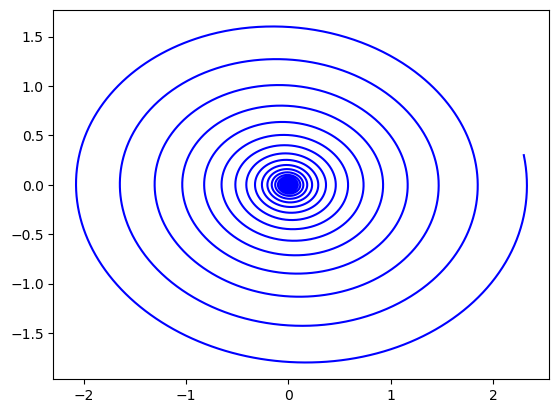

In [56]:
plt.plot(x,v,'b')

This is a plot of how the coordinate $(x,v)$ in *configuration space* evolves with time $t$. Configuration space (the space of all possible values of $(x,v)$, which is therefore an infinite plane in 2D) is also known as *phase space*. We have therefore made a phase-space plot.  

The most obvious thing we can see here is that *any* initial condition $(x_0,v_0)$ eventually ends up at the origin $(0,0)$ if there is any finite value of damping $b$. The origin is said to *attract* other points in phase space; it is an *attractor*. Here there is a single attractor; there are many other kinds of attractors, which are generally not single points in phase space. A question for you to examine is whether these *trajectories* in phase space (the path taken after some initial configuration) cross or not with other trajectories (for a given fixed physical system with particular $m$, $k$, $b$ values. This is a very profound statement in dynamics systems theory.

Some other questions to ask yourself are:
- If there is no damping, what *should* the phase space plot look like, and what *does* it look like for Euler's method?
- What is the best way to compare different algorithms with each other? I suggest you look at calculating the *energy* of the oscillator as a function of time.
- How does the accuracy of a particular algorithm depend on $h$?
- Are there any algorithms that *conserve* energy (from a calculation point of view?)

Euler's method is known as a *forward* method, because it takes the configuration at some time $t$ and calculates the configuration at some *later* time $t+h$. It is also an *explicit* method because there is a formula for all the values at $t+h$ that you can write down. However, Euler's method is just one of *many* different algorithms. Many are so-called *implicit* methods where some intermediate calculation must be performed - Verlet's method is one of those. Some involve *higher-order* corrections to obtain better accuracy for a given step size $h$. The most commonly-used one is 4th-order Runge-Kutta method. We don't discuss that here, but you are welcome to include it if you wish in your analysis. There is also the 2nd-order Runge-Kutta method, and indeed higher-order methods.  
  
  
Finally, we should distinguish between those methods which *conserve* energy in the calculation from those that do not. A way to start exploring whether an algorithm conserves energy is to calculate the evolution of a system that physically *should* conserve energy (i.e. it has no damping), and see whether the numerical approximation obtained with the algorithm actually does conserve energy. Energy-conserving algorithms are known as *symplectic integrators*. Which of the algorithms studied in this project are symplectic?